# Classification of iris flowers using a linear classifier

Classification is an important technique in data analysis. For example, one would like to develop a model to classify hand-written characters into one of the alphabets in a language. There are a number of methods for such problems, each can be tailored to the dataset at hand and degree of robustness necessary.

To begin with, we will apply the classification algorithm on the entire dataset, i.e., without paritioning the data into training and test sets. 

## Two-variables classification using sepal length and sepal width

### Let's visualize the iris dataset as a map in these two variables.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

sc = StandardScaler()
x_iris = sc.fit_transform(x_iris)

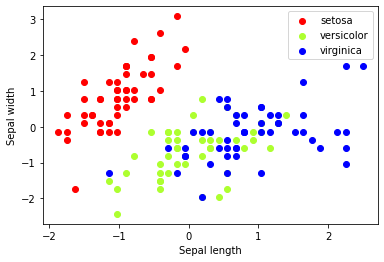

In [2]:
import matplotlib.pyplot as plt
colors=['red','greenyellow','blue']
for i in range(len(colors)):
    xs=x_iris[:,0][y_iris==i]
    ys=x_iris[:,1][y_iris==i]
    plt.scatter(xs,ys,c=colors[i])
plt.figaspect(1.0)
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Linear classification using stochastic gradient descent

In this method, classification is done by separating each species from the rest by _hyperplanes_ in the _feature space_. In the 2D space, the hyperplanes are straight lines. 

In [3]:
from sklearn.linear_model import SGDClassifier

# The classification model is stochastic gradient classifier
clf_model=SGDClassifier()

# We will use sepal length/width as features
features=x_iris[:,0:2]

# Label needed for classification are 0,1,2
label=y_iris

# Fit
clf_model.fit(features, label)

# Coefficients and intercepts to define the hyperplane
coeffs=clf_model.coef_
intercept=clf_model.intercept_

### Visualize the hyerplanes

Since we have three labels, we will have three hyperplanes each defined in terms of coefficients and intercepts. 

In [4]:
print(coeffs)

[[-30.25003837   8.81740225]
 [  3.83781687  -4.29126682]
 [  4.15875762  -1.72232959]]


In [5]:
print(intercept)

[-18.45317881  -1.31594228  -1.91874056]


The first hyperplane is defined by the equation $i_1 + c_{11} x_1 + c_{12} x_2=0 \Rightarrow x_2 = -i_1/c_{12} - c_{11}/c_{12} x_1=(-i_1-c_{11}x_1)/c_{12}$, which is an equation of a straight line. 

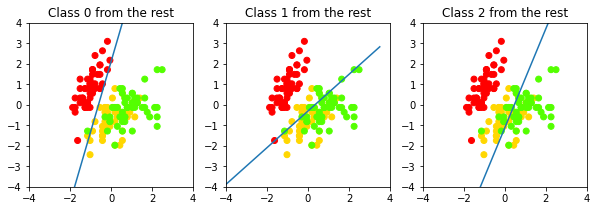

In [6]:
x1_min, x1_max = -4, 4
x2_min, x2_max = -4, 4

xs = np.arange(x1_min, x1_max, 0.5)

fig, axes = plt.subplots(1,3,figsize=(10,10))

for i in [0, 1, 2]:
    axes[i].set_aspect(1.0)
    axes[i].set_title('Class '+str(i)+' from the rest')
    axes[i].set_xlim(x1_min, x1_max)
    axes[i].set_ylim(x2_min, x2_max)
    axes[i].scatter(features[:,0], features[:,1], c=label, cmap=plt.cm.prism)
    ys=(-intercept[i]-xs*coeffs[i,0])/coeffs[i,1]
    axes[i].plot(xs,ys)

In [7]:
from sklearn import metrics
y_pred=clf_model.predict(features)
print(metrics.accuracy_score(y_pred,label))

0.72


In [8]:
print(metrics.classification_report(y_pred,y_iris))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.86      0.56      0.68        77
           2       0.30      0.71      0.42        21

    accuracy                           0.72       150
   macro avg       0.72      0.74      0.69       150
weighted avg       0.83      0.72      0.75       150



In [9]:
print(metrics.classification_report(y_pred,y_iris,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.96      0.98        52
  versicolor       0.86      0.56      0.68        77
   virginica       0.30      0.71      0.42        21

    accuracy                           0.72       150
   macro avg       0.72      0.74      0.69       150
weighted avg       0.83      0.72      0.75       150

